## Gait Video Study 
### Feature importance

### Conditional entropies

In [10]:
#For conditional entropies, we need to discretize each feature into intervals an assign labels to their corresponding 
#binning interval 
#Assigning each value to it's corresponding interval by labelling it from 1 to interval_length 
def find_label(value, interval): 
    int_val = interval[1] - interval[0]
    label = 1
    for lower_bound in interval[0:]:
        upper_bound = lower_bound + int_val
        if ((lower_bound <= value) & (value < upper_bound)):
            return(label)
        label += 1
    return(label)

#converts a continous feature values array to a discrete feature labels array 
def continuous_to_discrete(array, num_interval):
    max_val = array.max()
    min_val = array.min()
    cur_interval = np.linspace(min_val, max_val + (0.000001 / num_interval), num_interval + 1)
    label_array = []
    for value in array:
        cur_index = find_label(value, cur_interval)
        label_array.append(cur_index)    
    return(label_array)

#### Trial W for conditional entropy

In [8]:
#Trial W for training 
#21 features for training data to compute conditional entropy for 
regressN_trial1 = regressN_df[regressN_df['TrialID']==1]
#Ordering the featuresaccording to paper's order
ordered_features = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_R', 'DS_L', 'cadence',
       'stride_length', 'stride_width',  'LeftFPA', 'RightFPA', 'stride_speed',
       'walk_ratio', 'force_HSR', 'force_TOL', 'force_MidSSR', 'force_HSL', 'force_TOR', 'force_MidSSL',  'Butterfly_x_abs',
       'ButterflySQ_x', 'Label', 'PID', 'TrialID']
regressN_trial1 = regressN_trial1[ordered_features]
regressN_trainX = regressN_trial1.drop(['Label', 'PID', 'TrialID'], axis = 1) 
regressN_trainY = regressN_trial1[['PID', 'Label']]

#Trial WT for testing 
regressN_trial2 = regressN_df[regressN_df['TrialID']==2]
regressN_testX = regressN_trial2.drop(['Label', 'PID', 'TrialID'], axis = 1)
regressN_testY = regressN_trial2[['PID', 'Label']] #PID to compute person based metrics later 

#Normalize according to z-score standardization
norm_mean, norm_sd = normalize(regressN_trainX, 'z')
regressN_trainX_norm = (regressN_trainX-norm_mean)/norm_sd #Use this data for computing conditional entropies 
regressN_testX_norm = (regressN_testX-norm_mean)/norm_sd

In [12]:
# We select Regress-N data for trial generalize and only do conditional entropies on the training data set i.e. trial 1 features 
entropies=pd.DataFrame(index=regressN_trainX_norm.columns, columns = ['values'])
num_interval = 200
training_labels = np.array(regressN_trainY['Label'].values).astype('int')

for c in regressN_trainX_norm.columns.tolist():
    discrete_features = np.array(continuous_to_discrete(regressN_trainX_norm[c].values, num_interval)).astype('int')
    h=drv.entropy_conditional(training_labels, discrete_features)
    entropies.loc[c]=h
    
entropies_sorted= entropies.sort_values(by = 'values', ascending = False)
entropies.to_csv(path+ '..//trial_generalize//trial_generalize_conditional_entropies.csv')

In [13]:
feature_display_names = ['Stride time', 'Stance time', 'Swing time', 'Right SS', 'Initial DS', 
                         'Terminal DS', 'Cadence', 'Stride length', 'Stride width', 'Left FPA', 'Right FPA', 'Stride speed',
                           'Walk ratio', 'Force-HSR', 'Force-TOL', 'Force-MidSSR', 'Force-HSL',
                           'Force-TOR', 'Force-MidSSL', 'Lateral shift', 'Lateral deviation']
names = [r'$ST$', r'$S_tT$', r'$S_wT$', r'$SS_R$', r'$DS_T$',
       r'$DS_I$',  r'$C$', r'$SL$', r'$SW$', r'$\theta_L$', r'$\theta_R$', r'$SS$',
       r'$W$', r'$F_{HSR}$', r'$F_{TOL}$', r'$F_{MidSSR}$', r'$F_{HSL}$',
       r'$F_{TOR}$', r'$F_{MidSSL}$', r'$\beta_L$', r'$\alpha_L$']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(21)}


#### Trial WT for conditional entropy

In [14]:
#Trial W for training 
#21 features for training data to compute conditional entropy for 
regressN_trial1 = regressN_df[regressN_df['TrialID']==2]
#Ordering the featuresaccording to paper's order
ordered_features = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_R', 'DS_L', 'cadence',
       'stride_length', 'stride_width',  'LeftFPA', 'RightFPA', 'stride_speed',
       'walk_ratio', 'force_HSR', 'force_TOL', 'force_MidSSR', 'force_HSL', 'force_TOR', 'force_MidSSL',  'Butterfly_x_abs',
       'ButterflySQ_x', 'Label', 'PID', 'TrialID']
regressN_trial1 = regressN_trial1[ordered_features]
regressN_trainX = regressN_trial1.drop(['Label', 'PID', 'TrialID'], axis = 1) 
regressN_trainY = regressN_trial1[['PID', 'Label']]

#Trial WT for testing 
regressN_trial2 = regressN_df[regressN_df['TrialID']==2]
regressN_trial2 = regressN_trial2[ordered_features]
regressN_testX = regressN_trial2.drop(['Label', 'PID', 'TrialID'], axis = 1)
regressN_testY = regressN_trial2[['PID', 'Label']] #PID to compute person based metrics later 

#Normalize according to z-score standardization
norm_mean, norm_sd = normalize(regressN_trainX, 'z')
regressN_trainX_norm = (regressN_trainX-norm_mean)/norm_sd #Use this data for computing conditional entropies 

norm_mean_test, norm_sd_test = normalize(regressN_testX, 'z')
regressN_testX_norm = (regressN_testX-norm_mean_test)/norm_sd_test

In [15]:
# We select Regress-N data for trial generalize and only do conditional entropies on the training data set i.e. trial 1 features 
entropies2=pd.DataFrame(index=regressN_testX_norm.columns, columns = ['values'])
num_interval = 200
training_labels = np.array(regressN_testY['Label'].values).astype('int')

for c in regressN_testX_norm.columns.tolist():
    discrete_features = np.array(continuous_to_discrete(regressN_testX_norm[c].values, num_interval)).astype('int')
    h=drv.entropy_conditional(training_labels, discrete_features)
    entropies2.loc[c]=h
    
entropies_sorted2= entropies2.sort_values(by = 'values', ascending = False)
entropies2.to_csv(path+ '..//trial_generalize//trial_generalize_conditional_entropies_trialWT.csv')

In [16]:
feature_display_names = ['Stride time', 'Stance time', 'Swing time', 'Right SS', 'Initial DS', 
                         'Terminal DS', 'Cadence', 'Stride length', 'Stride width', 'Left FPA', 'Right FPA', 'Stride speed',
                           'Walk ratio', 'Force-HSR', 'Force-TOL', 'Force-MidSSR', 'Force-HSL',
                           'Force-TOR', 'Force-MidSSL', 'Lateral shift', 'Lateral deviation']
names = [r'$ST$', r'$S_tT$', r'$S_wT$', r'$SS_R$', r'$DS_T$',
       r'$DS_I$',  r'$C$', r'$SL$', r'$SW$', r'$\theta_L$', r'$\theta_R$', r'$SS$',
       r'$W$', r'$F_{HSR}$', r'$F_{TOL}$', r'$F_{MidSSR}$', r'$F_{HSL}$',
       r'$F_{TOR}$', r'$F_{MidSSL}$', r'$\beta_L$', r'$\alpha_L$']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(21)}


In [17]:
#Adding different colors in CE plot for differeent feature types 
#Spatial - yellow, Temporal - blue, spatiotemporal - green, kinetic - red

ordered_features = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_R', 'DS_L', 'cadence',
       'stride_length', 'stride_width',  'LeftFPA', 'RightFPA', 'stride_speed',
       'walk_ratio', 'force_HSR', 'force_TOL', 'force_MidSSR', 'force_HSL', 'force_TOR', 'force_MidSSL',  'Butterfly_x_abs',
       'ButterflySQ_x', 'Label', 'PID', 'TrialID']

colors = ['#66b3ff', '#66b3ff', '#66b3ff', '#66b3ff', '#66b3ff', '#66b3ff', '#66b3ff']+ \
         4*['palegreen']+2*['plum'] + 8*['salmon']

color_dic = {ordered_features[i]:colors[i] for i in range(21)}

In [18]:
colors.reverse()
entropies = entropies.iloc[::-1]
entropies2 = entropies2.iloc[::-1]

entropies['colors'] = colors
entropies = entropies.sort_values(by = ['colors', 'values'], ascending= False)

entropies2['colors'] = colors
entropies2 = entropies2.sort_values(by = ['colors', 'values'], ascending= False)

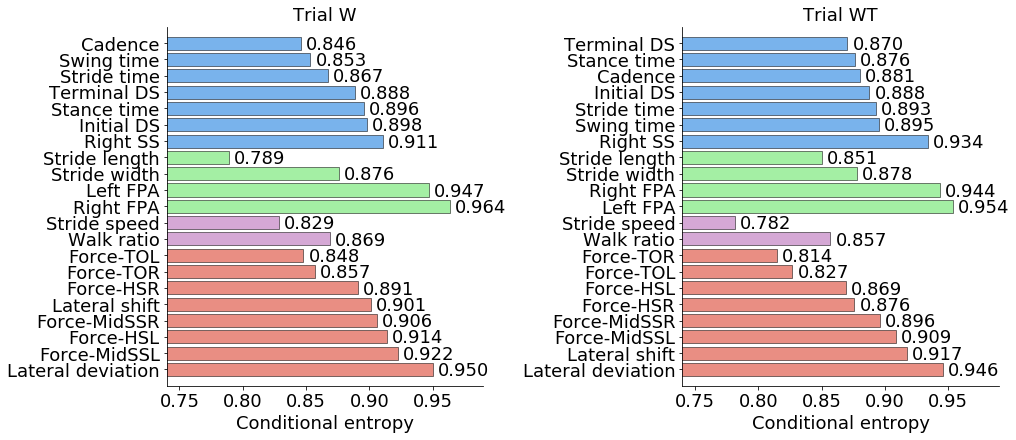

In [97]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

fig, axes = plt.subplots(1, 2, sharex=True, sharey = False, figsize=(14, 6), constrained_layout=True)
axes[0].tick_params(labelsize=18)
# fig.tight_layout()
# sns.despine(offset=0)
# colors_sorted = [color_dic[x] for x in entropies_sorted.index]
sns.barplot(x = 'values', y = entropies.index, data=entropies,  palette= colors, linewidth = 0.5, \
                 edgecolor = 'k', ax = axes[0])
#palette= colors_sorted, #use for colored plot
feature_display_names_sorted = [feature_dic[x] for x in entropies.index]
for p in axes[0].patches:
    axes[0].annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()-0.35),
                xytext=(5, 6), textcoords='offset points', fontsize = 18)
    
axes[0].set_yticks(np.arange(21))
axes[0].set_yticklabels(feature_display_names_sorted, fontsize = 18)
axes[0].set_ylim(-1,21)
axes[0].set_xlim(0.74, 0.99)
axes[0].set_xlabel('Conditional entropy', fontsize = 18)
axes[0].set_title('Trial W', fontsize = 18)

colors_sorted2 = [color_dic[x] for x in entropies_sorted2.index]
sns.barplot(x = 'values', y = entropies2.index, data=entropies2, palette= colors, linewidth = 0.5, \
                 edgecolor = 'k', ax = axes[1])
feature_display_names_sorted2 = [feature_dic[x] for x in entropies2.index]

for p in axes[1].patches:
    axes[1].annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()-0.35),
                xytext=(5, 6), textcoords='offset points', fontsize = 18)
    
axes[1].set_yticks(np.arange(21))
axes[1].tick_params(labelsize=18)
axes[1].set_yticklabels(feature_display_names_sorted2, fontsize = 18)
axes[1].set_ylim(-1,21)
axes[1].set_xlim(0.74, 0.99)
axes[1].set_xlabel('Conditional entropy', fontsize = 18)
axes[1].set_title('Trial WT', fontsize = 18)

# plt.title('Feature conditional entropies')
plt.savefig(path+ '..//trial_generalize//Conditional_entropies_trialWandWT_colored_sorted.png', dpi = 550, bbox_inches='tight')
plt.show()

In [218]:
entropies_trialWandWT = pd.concat([entropies_sorted, entropies_sorted2], axis = 1)
entropies_trialWandWT.columns = ['trialW', 'trialWT']

In [468]:
(entropies_trialWandWT['trialW']<entropies_trialWandWT['trialWT']).sum()

8

#### Both trials together in conditional entropy

In [42]:
#Trial W and WT together 
#Trial W for training 
#21 features for training data to compute conditional entropy for 
regressN= regressN_df
#Ordering the featuresaccording to paper's order
ordered_features = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_R', 'DS_L', 'cadence',
       'stride_length', 'stride_width',  'LeftFPA', 'RightFPA', 'stride_speed',
       'walk_ratio', 'force_HSR', 'force_TOL', 'force_MidSSR', 'force_HSL', 'force_TOR', 'force_MidSSL',  'Butterfly_x_abs',
       'ButterflySQ_x', 'Label', 'PID', 'TrialID']
regressN = regressN[ordered_features]
regressN_trainX = regressN.drop(['Label', 'PID', 'TrialID'], axis = 1) 
regressN_trainY = regressN[['PID', 'Label']]


#Normalize according to z-score standardization
norm_mean, norm_sd = normalize(regressN_trainX, 'z')
regressN_trainX_norm = (regressN_trainX-norm_mean)/norm_sd #Use this data for computing conditional entropies 

In [116]:
# We select Regress-N data for trial generalize and only do conditional entropies on the training data set i.e. trial 1 features 
entropies3=pd.DataFrame(index=regressN_trainX_norm.columns, columns = ['values'])
num_interval = 200
training_labels = np.array(regressN_trainY['Label'].values).astype('int')

for c in regressN_trainX_norm.columns.tolist():
    discrete_features = np.array(continuous_to_discrete(regressN_trainX_norm[c].values, num_interval)).astype('int')
    h=drv.entropy_conditional(training_labels, discrete_features)
    entropies3.loc[c]=h
    
entropies_sorted3= entropies3.sort_values(by = 'values', ascending = False)
entropies3.to_csv(path+ '..//trial_generalize//Conditional_entropies_both_trial_together.csv')

In [117]:
feature_display_names = ['Stride time', 'Stance time', 'Swing time', 'Right SS', 'Initial DS', 
                         'Terminal DS', 'Cadence', 'Stride length', 'Stride width', 'Left FPA', 'Right FPA', 'Stride speed',
                           'Walk ratio', 'Force-HSR', 'Force-TOL', 'Force-MidSSR', 'Force-HSL',
                           'Force-TOR', 'Force-MidSSL', 'Lateral shift', 'Lateral deviation']
names = [r'$ST$', r'$S_tT$', r'$S_wT$', r'$SS_R$', r'$DS_T$',
       r'$DS_I$',  r'$C$', r'$SL$', r'$SW$', r'$\theta_L$', r'$\theta_R$', r'$SS$',
       r'$W$', r'$F_{HSR}$', r'$F_{TOL}$', r'$F_{MidSSR}$', r'$F_{HSL}$',
       r'$F_{TOR}$', r'$F_{MidSSL}$', r'$\beta_L$', r'$\alpha_L$']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(21)}


In [118]:
entropies3 = entropies3.iloc[::-1]

entropies3['colors'] = colors
entropies3 = entropies3.sort_values(by = ['colors', 'values'], ascending= False)

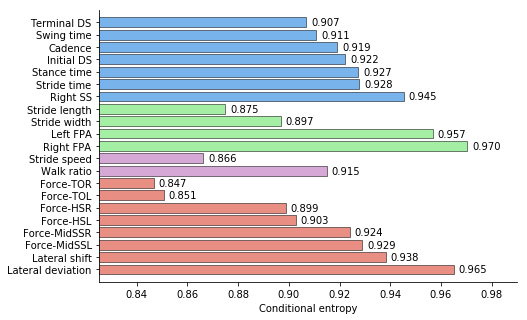

In [119]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

plt.figure(figsize=(7.5, 5))
# fig.tight_layout()
# sns.despine(offset=0)
colors_sorted3 = [color_dic[x] for x in entropies_sorted3.index]
ax = sns.barplot(x = 'values', y = entropies_sorted3.index, data=entropies3, palette= colors, linewidth = 0.5, \
                 edgecolor = 'k')
feature_display_names_sorted = [feature_dic[x] for x in entropies3.index]
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()-0.35),
                xytext=(5, 6), textcoords='offset points')
    
ax.set_yticks(np.arange(21))
ax.set_yticklabels(feature_display_names_sorted)
ax.set_ylim(-1,21)
ax.set_xlim(0.825, 0.99)
ax.set_xlabel('Conditional entropy')
# ax.set_title('Feature conditional entropies')
# plt.title('Feature conditional entropies')
plt.savefig(path+ '..//trial_generalize//Conditional_entropies__both_trial_together_colored_sorted.png', dpi = 350, bbox_inches='tight')
plt.show()